In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Real Estate

In [19]:
import pandas as pd
import json

data = []
with open('d/final_data.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))

df1 = pd.DataFrame(data)
df1.head(1)



,building_address,clue_small_area,dwelling_type,longitude,latitude,geography_name,rai_national_total_2014_q2,rai_national_total_2014_q3,rai_national_total_2014_q4,rai_national_total_2021_q1,...,rai_national_total_2019_q2,rai_national_total_2017_q2,rai_national_total_2011_q4,rai_national_total_2018_q4,rai_national_total_2018_q3,rai_national_total_2018_q2,rai_national_total_2018_q1,rai_national_total_2021_q2,rai_national_total_2019_q3,rai_national_total_2019_q4
0,463 Queensberry Street NORTH MELBOURNE 3051,North Melbourne,House/Townhouse,144.952007,-37.803558,3051,114.6205,135.2163,109.8901,140.3326,...,108.9744,109.8901,99.7151,108.9744,122.5962,111.451,128.3729,148.3516,119.315,106.6054


### EDA

In [3]:
print(df1.describe())

           longitude       latitude   rai_national_total_2014_q2  \
count  195733.000000  195733.000000                195733.000000   
mean      144.951864     -37.802206                   110.378083   
std         0.021214       0.012814                    11.376734   
min       144.906336     -37.847308                    83.210060   
25%       144.932301     -37.806370                   105.534700   
50%       144.949500     -37.797607                   109.542400   
75%       144.970668     -37.794307                   114.620500   
max       144.990798     -37.775826                   127.262400   

        rai_national_total_2014_q3   rai_national_total_2014_q4  \
count                195733.000000                195733.000000   
mean                    116.854597                   111.908843   
std                      13.841901                     6.480523   
min                      78.671330                    84.685960   
25%                     105.534700                  

In [4]:
df1.columns

Index(['building_address', 'clue_small_area', 'dwelling_type', 'longitude',
       'latitude', 'geography_name', ' rai_national_total_2014_q2',
       ' rai_national_total_2014_q3', ' rai_national_total_2014_q4',
       ' rai_national_total_2021_q1', ' rai_national_total_2014_q1', ' state',
       ' rai_national_total_2020_q1', ' rai_national_total_2020_q2',
       ' rai_national_total_2020_q3', ' rai_national_total_2011_q2',
       ' rai_national_total_2020_q4', ' rai_national_total_2011_q1', ' city',
       ' unique_id', ' rai_national_total_2013_q3',
       ' rai_national_total_2013_q4', ' rai_national_total_2013_q1',
       ' rai_national_total_2012_q4', ' rai_national_total_2013_q2',
       ' rai_national_total_2015_q3', ' rai_national_total_2015_q4',
       ' rai_national_total_2015_q1', ' rai_national_total_2015_q2',
       ' rai_national_total_2016_q1', ' rai_national_total_2016_q2',
       ' rai_national_total_2016_q3', ' rai_national_total_2016_q4',
       ' rai_national_tota

          longitude      latitude     unique_id           RAI          year
count  8.025053e+06  8.025053e+06  8.025053e+06  8.025053e+06  8.025053e+06
mean   1.449519e+02 -3.780221e+01  1.347573e+03  1.132018e+02  2.015878e+03
std    2.121355e-02  1.281408e-02  2.987096e+01  1.403360e+01  2.981202e+00
min    1.449063e+02 -3.784731e+01  1.310000e+03  7.085020e+01  2.011000e+03
25%    1.449323e+02 -3.780637e+01  1.336000e+03  1.037165e+02  2.013000e+03
50%    1.449495e+02 -3.779761e+01  1.354000e+03  1.098901e+02  2.016000e+03
75%    1.449707e+02 -3.779431e+01  1.355000e+03  1.196060e+02  2.018000e+03
max    1.449908e+02 -3.777583e+01  1.494000e+03  1.674938e+02  2.021000e+03


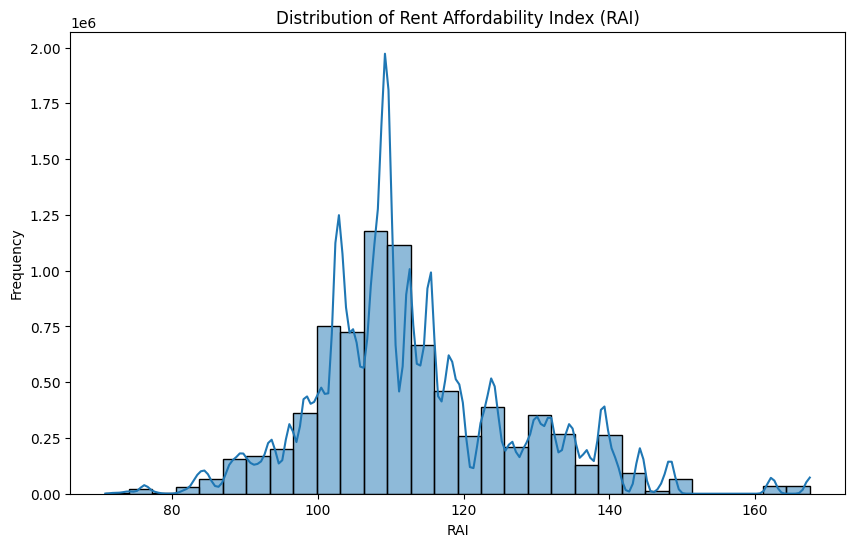

In [5]:
# Extract RAI columns
df = df1
rai_columns = [col for col in df.columns if 'rai_national_total' in col]

# Melt the dataframe for easier plotting
df_melted = df.melt(id_vars=['building_address', 'clue_small_area', 'dwelling_type', 'longitude', 'latitude', 'geography_name', ' state', ' city', ' unique_id'], 
                    value_vars=rai_columns, 
                    var_name='year_quarter', 
                    value_name='RAI')

# Extract year and quarter from the 'year_quarter' column
df_melted['year'] = df_melted['year_quarter'].apply(lambda x: int(x.split('_')[-2]))
df_melted['quarter'] = df_melted['year_quarter'].apply(lambda x: x.split('_')[-1])

# Basic statistics
print(df_melted.describe())

# Distribution of RAI values
plt.figure(figsize=(10, 6))
sns.histplot(df_melted['RAI'], bins=30, kde=True)
plt.title('Distribution of Rent Affordability Index (RAI)')
plt.xlabel('RAI')
plt.ylabel('Frequency')
plt.show()


### Time series plot

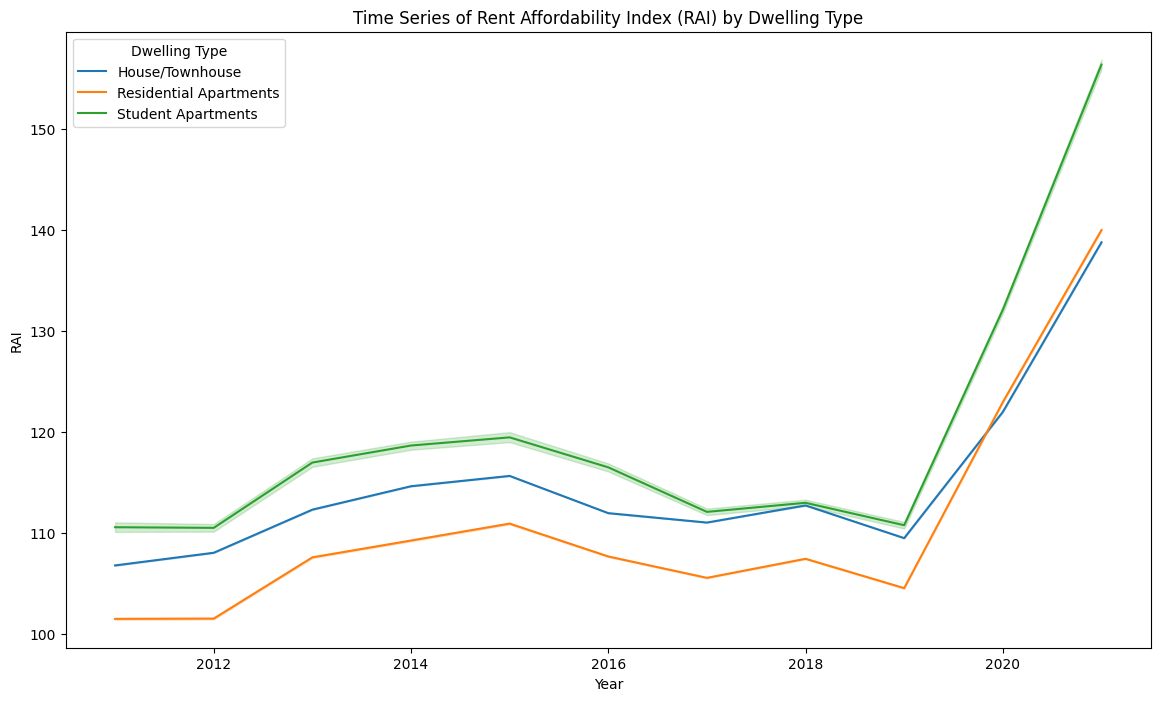

In [6]:
# Time series plot
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_melted, x='year', y='RAI', hue='dwelling_type')
plt.title('Time Series of Rent Affordability Index (RAI) by Dwelling Type')
plt.xlabel('Year')
plt.ylabel('RAI')
plt.legend(title='Dwelling Type')
plt.show()


### Bar Plot of Average RAI by Dwelling Type and Year

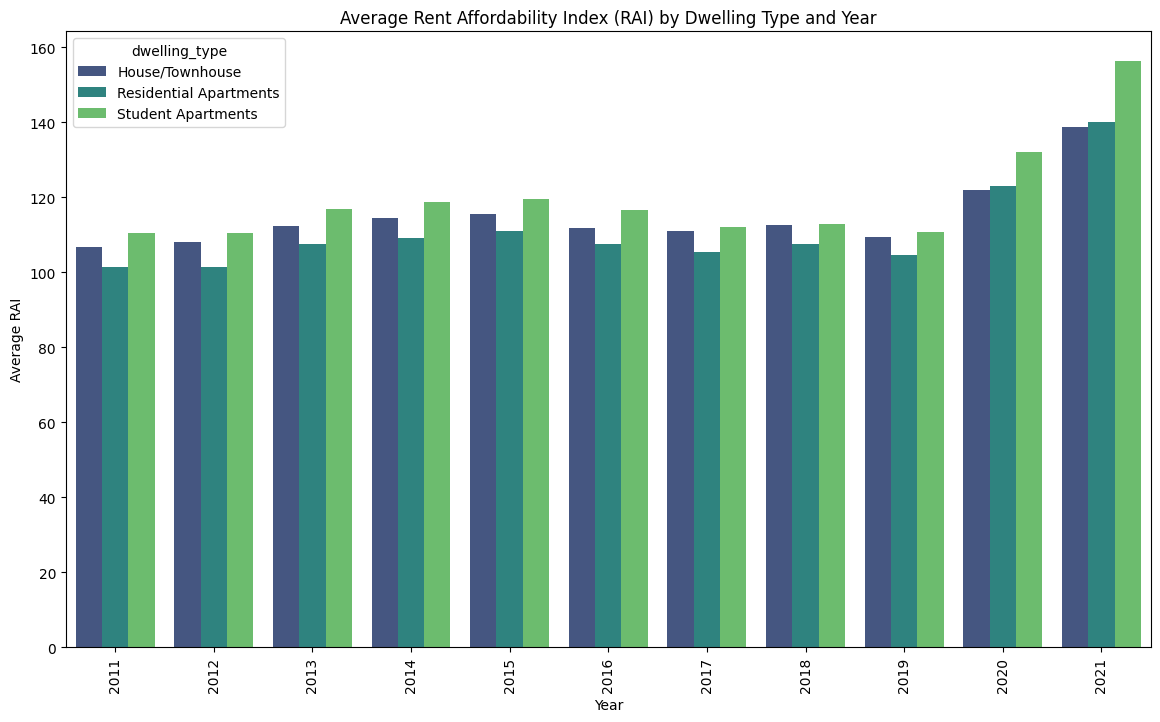

In [7]:
# Average RAI by dwelling type and year
avg_rai = df_melted.groupby(['year', 'dwelling_type'])['RAI'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(data=avg_rai, x='year', y='RAI', hue='dwelling_type', palette='viridis')
plt.title('Average Rent Affordability Index (RAI) by Dwelling Type and Year')
plt.xlabel('Year')
plt.ylabel('Average RAI')
plt.xticks(rotation=90)
plt.show()


In [9]:
pip install folium


### Geographical Distribution of RAI


In [10]:
import folium

# Create a map centered around the average latitude and longitude
map_center = [df['latitude'].mean(), df['longitude'].mean()]
map_ = folium.Map(location=map_center, zoom_start=12)

# Add markers to the map
for idx, row in df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        popup=f"{row['building_address']} - RAI: {row[' rai_national_total_2021_q2']}",
        color='red',
        fill=True,
        fill_color='red'
    ).add_to(map_)

# Save the map to an HTML file
map_.save('rai_geographical_distribution_map.html')


# Child Care

In [11]:
import json

with open('./child_care_with_air_quality.json', 'r') as f:
    air_data = json.load(f)
airdf = pd.DataFrame(air_data)
airdf.head(1)

,postcode,legal_name,suburb,address,ogc_fid,longitude,latitude,avg_air_quality
0,3012.0,AKRAAM FAMILY DAY CARE PTY LTD,MAIDSTONE,38A HOWARD ST,172,144.878,-37.783,8.847288


### EDA

In [12]:
# Basic statistics
df = airdf
print(df.describe())

# Unique values in categorical columns
print(df['suburb'].unique())
# print(df['legal_name'].unique())

          postcode      ogc_fid    longitude     latitude  avg_air_quality
count  2049.000000  2049.000000  2049.000000  2049.000000      2049.000000
mean   3201.626159  5926.683748   145.041286   -37.852082        16.434191
std     328.656254  2851.836727     0.173015     0.144324        12.328286
min    1481.000000   172.000000   144.599680   -38.392943         1.995000
25%    3055.000000  3713.000000   144.940596   -37.904400         6.479662
50%    3127.000000  7040.000000   145.043337   -37.831872         8.847288
75%    3178.000000  8491.000000   145.157000   -37.762825        31.612243
max    8005.000000  9732.000000   145.466492   -37.570937        42.774609
['MAIDSTONE' 'PANTON HILL' 'NEWPORT' 'MULGRAVE' 'DONCASTER' 'KILSYTH'
 'WARRANDYTE' 'CLAYTON' 'BITTERN' 'CLAYTON SOUTH' 'BEAUMARIS' 'SPRINGVALE'
 'VERMONT' 'DANDENONG' 'VERMONT SOUTH' 'UPWEY' 'CAMBERWELL WEST'
 'CAMBERWELL' 'MEADOW HEIGHTS' 'SANDRINGHAM' 'BALWYN' 'LILYDALE'
 'CLARINDA' 'IVANHOE' 'TOORAK' 'ARMADALE' 'KEW' 'M

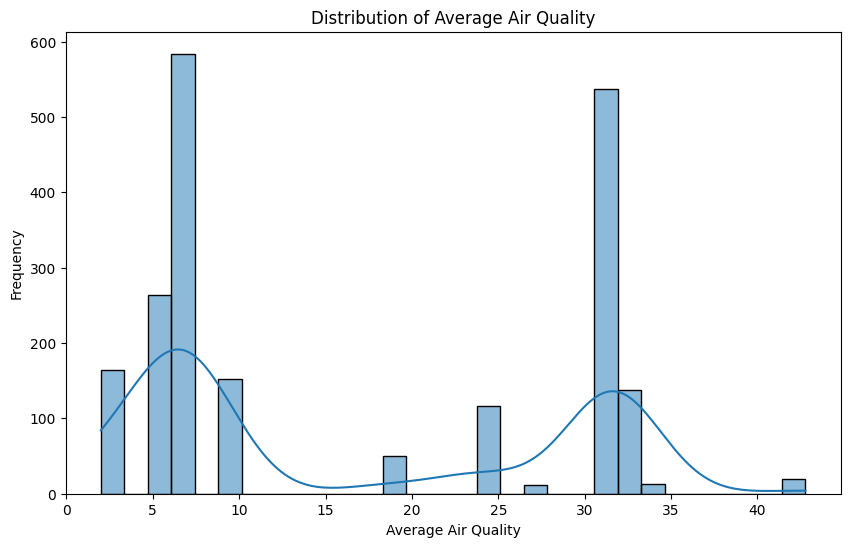

In [13]:
# Distribution of numerical data
plt.figure(figsize=(10, 6))
sns.histplot(df['avg_air_quality'], bins=30, kde=True)
plt.title('Distribution of Average Air Quality')
plt.xlabel('Average Air Quality')
plt.ylabel('Frequency')
plt.show()

### Scatter Plot of Air Quality vs. Longitude/Latitude

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

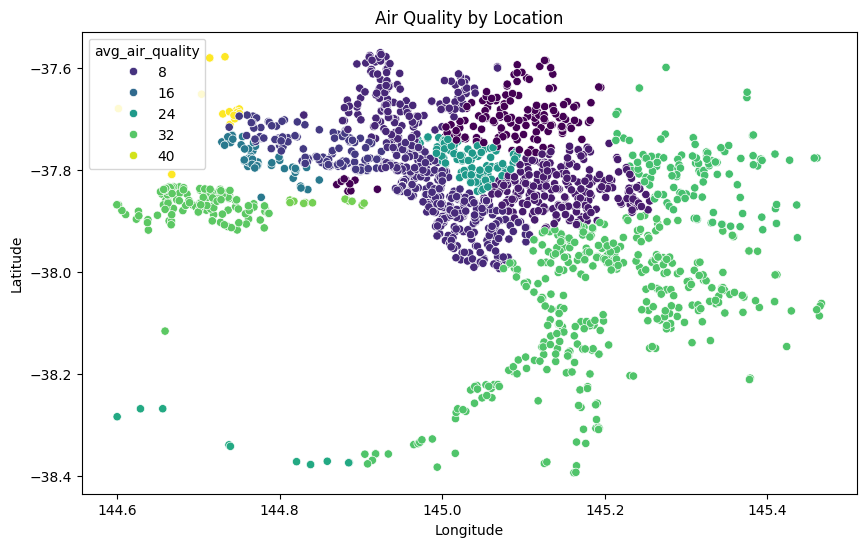

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='avg_air_quality', palette='viridis')
plt.title('Air Quality by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Average Air Quality')
plt.show()


### Bar Plot of Average Air Quality by Suburb

C:\Users\XZH\AppData\Local\Temp\ipykernel_56712\3819031918.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='suburb', y='avg_air_quality', palette='viridis')


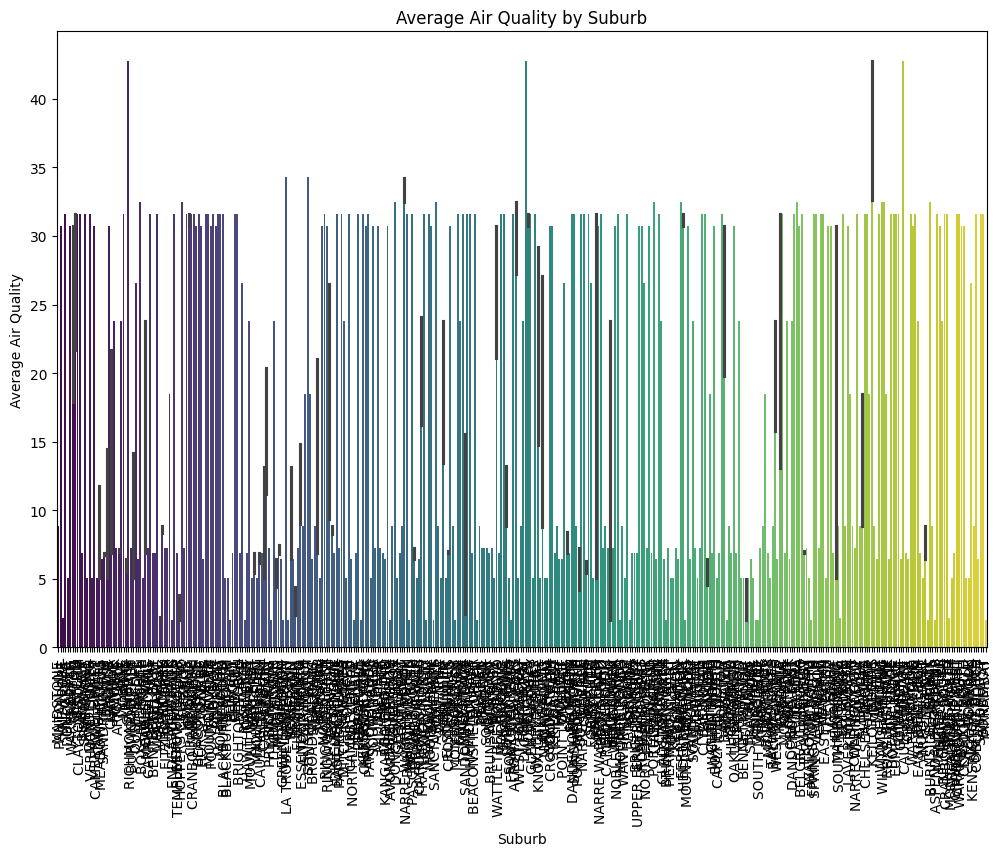

In [15]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='suburb', y='avg_air_quality', palette='viridis')
plt.title('Average Air Quality by Suburb')
plt.xlabel('Suburb')
plt.ylabel('Average Air Quality')
plt.xticks(rotation=90)
plt.show()


C:\Users\XZH\AppData\Local\Temp\ipykernel_56712\891594697.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_suburbs, x='suburb', y='avg_air_quality', palette='viridis')


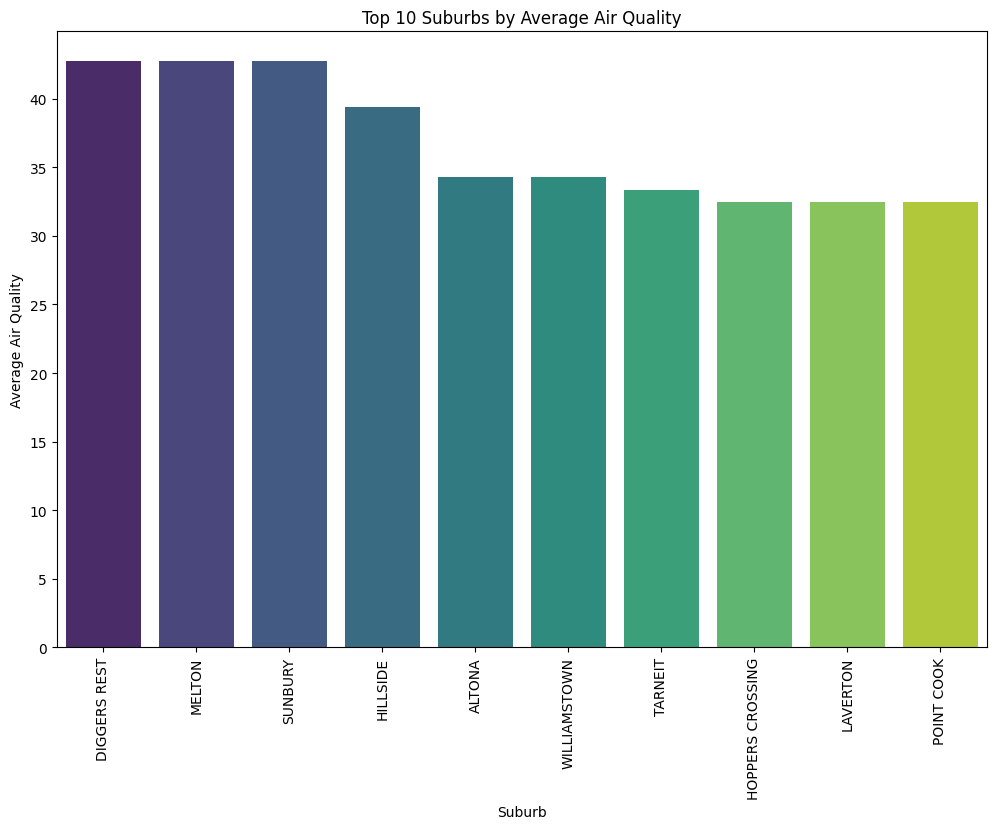

In [16]:
# Group by suburb and calculate the mean air quality
suburb_avg_air_quality = df.groupby('suburb')['avg_air_quality'].mean().reset_index()

# Select the top 10 suburbs with the highest average air quality
top_suburbs = suburb_avg_air_quality.nlargest(10, 'avg_air_quality')

# Bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=top_suburbs, x='suburb', y='avg_air_quality', palette='viridis')
plt.title('Top 10 Suburbs by Average Air Quality')
plt.xlabel('Suburb')
plt.ylabel('Average Air Quality')
plt.xticks(rotation=90)
plt.show()


### Map Visualization

In [15]:
!pip install folium

Keyring is skipped due to an exception: 'keyring.backends'
     |████████████████████████████████| 100 kB 31 kB/s ta 0:00:011
     |████████████████████████████████| 55 kB 605 kB/s eta 0:00:01


In [17]:
import folium

# Create a map centered around the average latitude and longitude
map_center = [df['latitude'].mean(), df['longitude'].mean()]
map_ = folium.Map(location=map_center, zoom_start=12)

# Add markers to the map
for idx, row in df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        popup=f"{row['legal_name']} - {row['avg_air_quality']}",
        color='blue',
        fill=True,
        fill_color='blue'
    ).add_to(map_)

# Save the map to an HTML file
map_.save('air_quality_map.html')


### Clustering

d:\墨大\python3.8\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


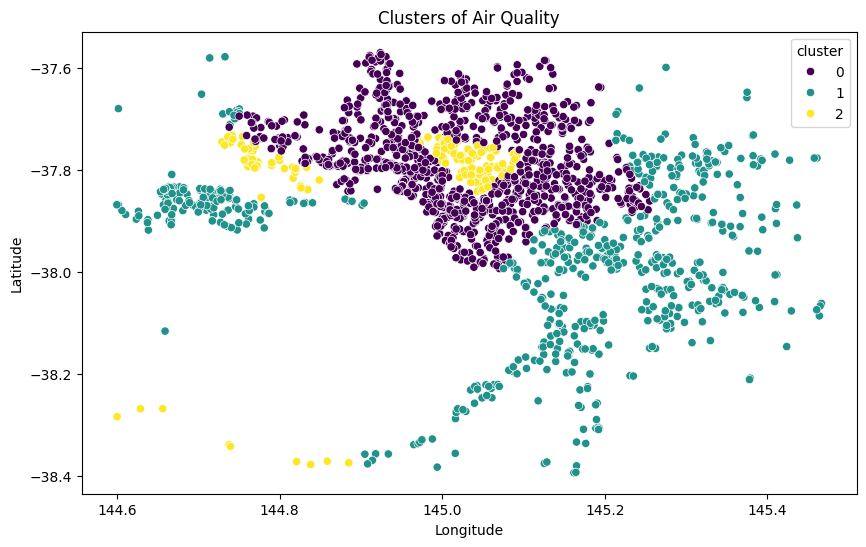

In [18]:
from sklearn.cluster import KMeans

# Select features for clustering
X = df[['longitude', 'latitude', 'avg_air_quality']]

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3)
df['cluster'] = kmeans.fit_predict(X)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='cluster', palette='viridis')
plt.title('Clusters of Air Quality')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
